In [2]:
import random
import subprocess

In [3]:
# dasgoclient --query="dataset dataset=/*/*NanoAODv7*/NANOAODSIM"
samples_file = open("allnanov7.txt")

In [5]:
samples_list = samples_file.readlines()

In [11]:
sample_names = [x.split("/")[1] for x in samples_list]
random.shuffle(sample_names)

In [12]:
sample_names[:10]

['VBF_HToZZTo4L_M165_13TeV_powheg2_JHUGenV7011_pythia8',
 'Wprimetotb_M3600W360_RH_TuneCP5_13TeV-madgraph-pythia8',
 'ZToMuMu_NNPDF31_13TeV-powheg_M_800_1400',
 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8',
 'VBFHHTo4B_CV_1_C2V_2_C3_1_13TeV-madgraph',
 'XtoAAto4b_X800A25_TuneCP5_13TeV-madgraph-pythia8',
 'ADDGravToLL_LambdaT-11000_M-1300To2000_13TeV-pythia8',
 'ChargedHiggs_HplusTB_HplusToTauNu_M-400_13TeV_amcatnlo_pythia8',
 'WWToLNuQQ_NNPDF31_TuneCP5_13TeV-powheg-pythia8',
 'SeesawTypeIII_SIGMAplusSIGMA0HH_M-1220_13TeV-madgraph-pythia8']

In [31]:
sample_process_keys = [x.split("_")[0] for x in sample_names]
processes = [x.split("To")[0] if "To" in x else x for x in sample_process_keys]

In [38]:
print("Number of samples", len(sample_names))
print("Number of unique keys",len(set(sample_process_keys)))

Number of samples 37252
Number of unique keys 1476


In [42]:
unique_processes = list(set(processes))
print("Number of unique process keys", len(set(processes)))

Number of unique process keys 524


In [48]:
process_counts = {x : 0 for x in unique_processes}

In [49]:
for x in processes:
    process_counts[x] += 1

In [62]:
leading_processes = [(k,v) for k,v in process_counts.items()]
leading_processes = [x for x in reversed(sorted(leading_processes, key=lambda x: x[1]))]

In [110]:
leading_processes[:10]

[('GluGlu', 2408),
 ('VBF', 1608),
 ('Zprime', 1264),
 ('Wprime', 1170),
 ('Radion', 961),
 ('SeesawTypeIII', 948),
 ('GluGluH', 864),
 ('Wp', 827),
 ('gluinoGMSB', 680),
 ('BulkGrav', 678)]

In [34]:
import matplotlib.pyplot as plt

In [106]:
leading_processes_list = list(filter(lambda x: x in [y[0] for y in leading_processes[:100]], processes))

In [76]:
import pandas
from collections import Counter

In [107]:
sample_counts = Counter(leading_processes_list)

In [108]:
df = pandas.DataFrame.from_dict(sample_counts, orient='index')

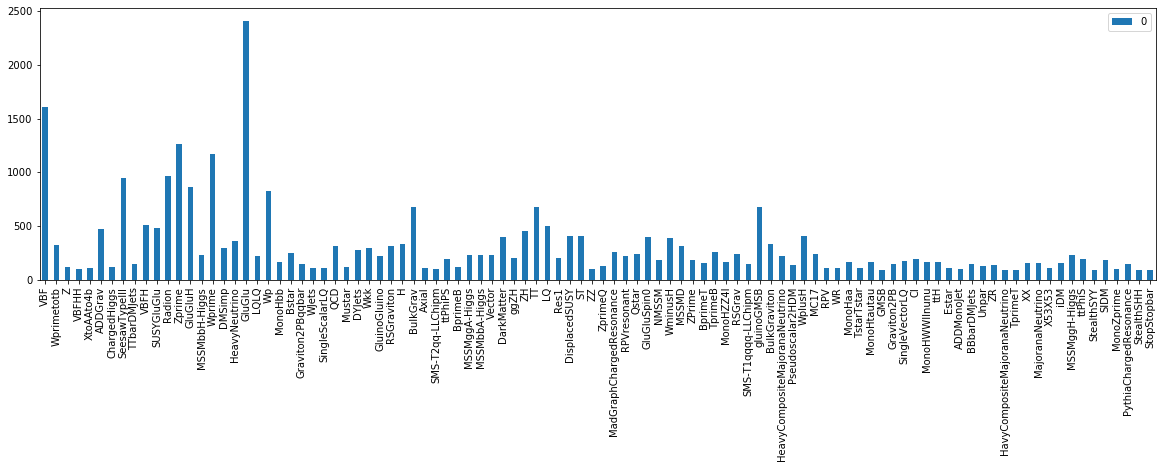

In [109]:
plt.rcParams['figure.figsize'] = [20, 5]
df.plot(kind='bar')